In [ ]:
!pip install mcerp

In [ ]:
pip install --upgrade mcerp

In [ ]:
from mcerp import correlate, correlation_matrix, plotcorr
from mcerp import Beta, N, Exp, PERT, LogNormal
from mcerp import uv, stats

In [1]:
# Tratamiento de datos
# ==============================================================================

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import pyplot as plt


# Configuración matplotlib
# ==============================================================================
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')



# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
from scipy.stats import norm
from scipy.stats import lognorm

import inspect
from statsmodels.distributions.empirical_distribution import ECDF


from mcerp import correlate, correlation_matrix, plotcorr
from mcerp import Beta, N, Exp, PERT, LogNormal
from mcerp import uv, stats

from scipy import stats as stats
from scipy.stats import rv_continuous, beta, genextreme, rv_histogram
import scipy.optimize as opt


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(precision=3, suppress=True)
pd.options.display.float_format = '{:.3f}'.format

from scipy.stats import anderson

# Número de simulaciones de los retornos
# ==============================================================================

!pip install fitter

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
ruta1 = "C:/Users/57350/Desktop/GITHUB/MODELAJE Y SIMULACIÓN/OPTIMIZACIÓN ESTOCÁSTICA PORTAFOLIO DE INVERSIÓN/DATA"
os.chdir(ruta1)

Importar datos

In [238]:
# Leer el set de datos
datos = pd.read_excel("data.xlsx")
datos.head()

,YPF,TRMD,ARLP,BTU,CEIX
0,0.025,-0.063,-0.030,-0.048,-0.047
1,0.079,0.043,0.034,0.056,0.042
2,0.035,0.015,-0.024,0.002,-0.083
3,0.045,0.004,0.018,-0.037,-0.015
4,0.050,0.052,0.015,0.012,-0.047


In [239]:
datos.isnull().sum()

YPF     0
TRMD    0
ARLP    0
BTU     0
CEIX    0
dtype: int64

In [242]:
datos.describe()

,YPF,TRMD,ARLP,BTU,CEIX
count,251.000,251.000,251.000,251.000,251.000
mean,0.029,0.006,0.004,0.006,0.004
std,0.021,0.038,0.030,0.056,0.048
min,0.000,-0.113,-0.093,-0.203,-0.099
25%,0.013,-0.018,-0.015,-0.028,-0.032
50%,0.024,0.005,0.003,0.004,0.012
75%,0.040,0.029,0.022,0.039,0.039
max,0.100,0.161,0.149,0.147,0.096


In [243]:
# Leer el set de datos
precios = pd.read_excel('precios.xlsx')

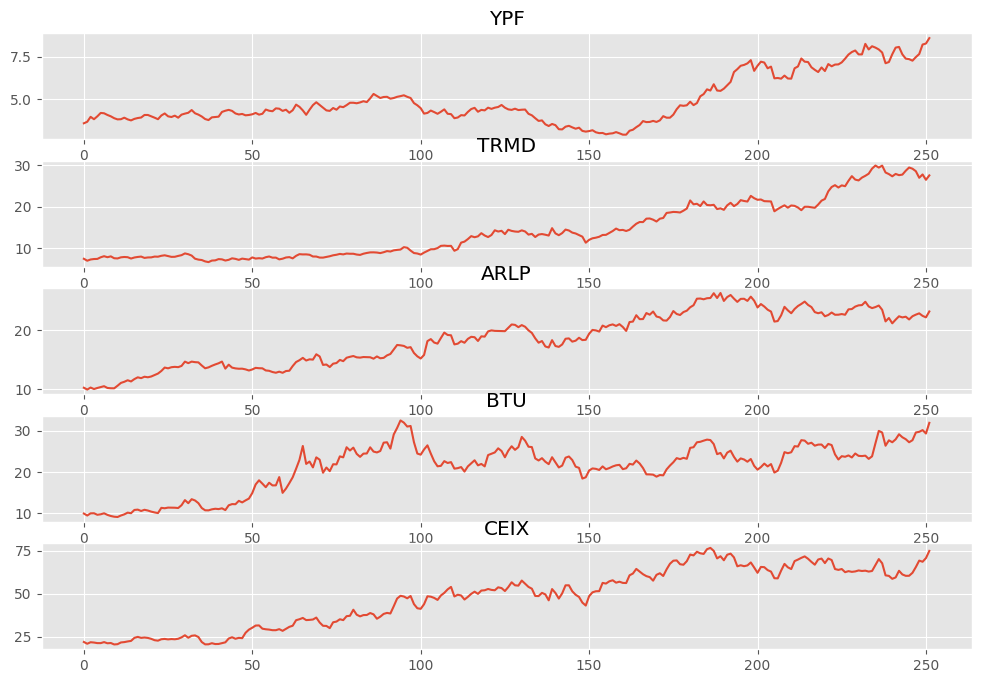

In [245]:
# Grafico precios de cierre

#Grafico Rendimiento

# Crea múltiples subgrafos
fig, ax = plt.subplots(5, figsize=(12,8))

# Dibujar gráficos
ax[0].plot(precios['YPF']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[0].set_title("YPF") # Establecer el título de la subimagen

ax[1].plot(precios['TRMD']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[1].set_title("TRMD") # Establecer el título de la subimagen

ax[2].plot(precios['ARLP']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[2].set_title("ARLP") # Establecer el título de la subimagen

ax[3].plot(precios['BTU']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[3].set_title("BTU") # Establecer el título de la subimagen

ax[4].plot(precios['CEIX']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[4].set_title("CEIX") # Establecer el título de la subimagen

# Mostrar
plt.show()

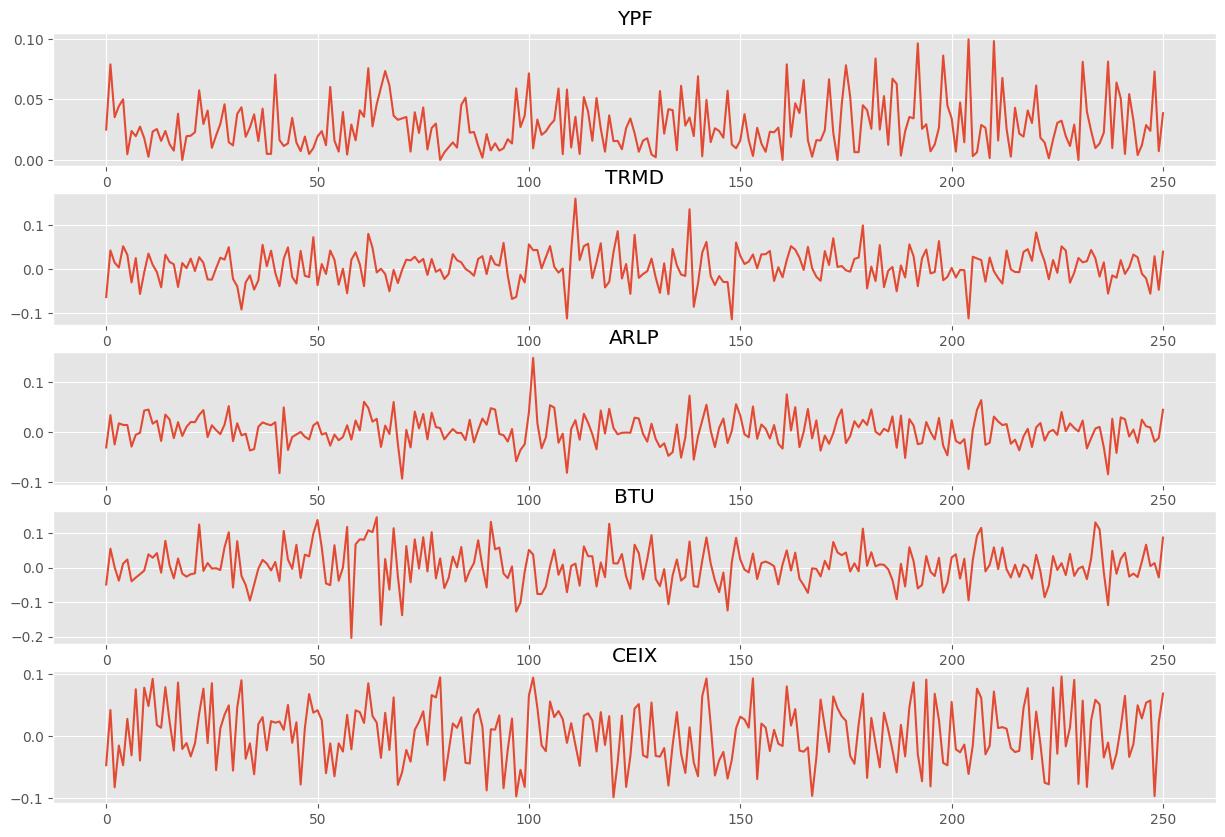

In [246]:

#Grafico Rendimiento

# Crea múltiples subgrafos
fig, ax = plt.subplots(5, figsize=(15,10))

# Dibujar gráficos
ax[0].plot(datos['YPF']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[0].set_title("YPF") # Establecer el título de la subimagen

ax[1].plot(datos['TRMD']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[1].set_title("TRMD") # Establecer el título de la subimagen

ax[2].plot(datos['ARLP']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[2].set_title("ARLP") # Establecer el título de la subimagen

ax[3].plot(datos['BTU']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[3].set_title("BTU") # Establecer el título de la subimagen

ax[4].plot(datos['CEIX']) # Dibuja el sistema de coordenadas (subgrafo) de la fila 0 y la columna 1, ir significa círculo verde, punto verde
ax[4].set_title("CEIX") # Establecer el título de la subimagen

# Mostrar
plt.show()

        YPF   TRMD   ARLP    BTU   CEIX
YPF   1.000 -0.101 -0.112 -0.120 -0.034
TRMD -0.101  1.000  0.436  0.344  0.259
ARLP -0.112  0.436  1.000  0.637  0.537
BTU  -0.120  0.344  0.637  1.000  0.568
CEIX -0.034  0.259  0.537  0.568  1.000


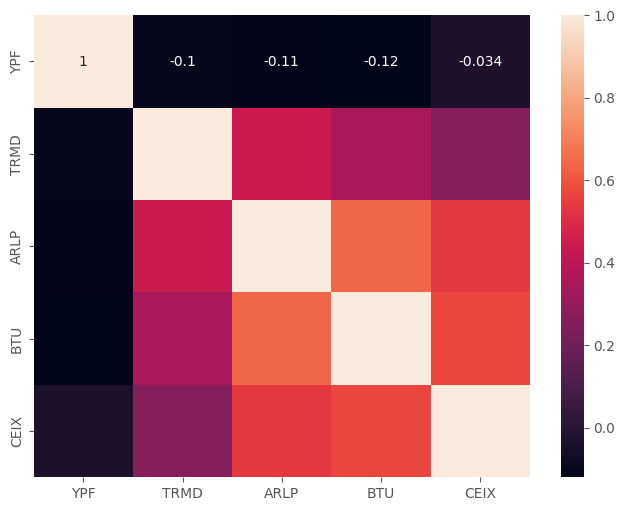

In [265]:
corr = datos.corr(method='pearson')

print(corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,3733.203,-351.463,-340.887,inf,0.033,0.933
beta,3738.821,-358.259,-344.157,inf,0.035,0.916
norm,5690.619,-301.665,-294.614,inf,0.115,0.002
lognorm,18931.468,459.462,470.038,inf,0.526,0.000
chi2,20418.569,-297.879,-287.303,inf,0.311,0.000


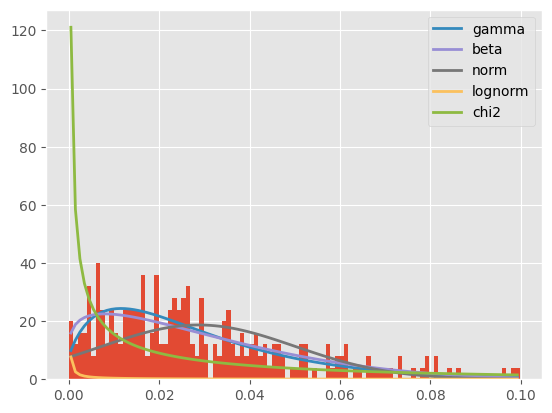

In [266]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(datos['YPF'],distributions=['gamma','lognorm','beta','norm','chi2'])
f.fit()
f.summary()

In [ ]:
# stats.kstest(datos['YPF'], "norm", alternative='less')
# shapiro_test = stats.shapiro(datos['YPF'])
# anderson(datos['YPF'])

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,447.795,-8.408,-1.357,inf,0.032,0.946
beta,448.369,-8.507,5.595,inf,0.032,0.946
gamma,449.158,-13.893,-3.316,inf,0.033,0.941
lognorm,487.878,-44.825,-34.248,inf,0.046,0.640
chi2,3705.483,-152.043,-141.467,inf,0.486,0.000


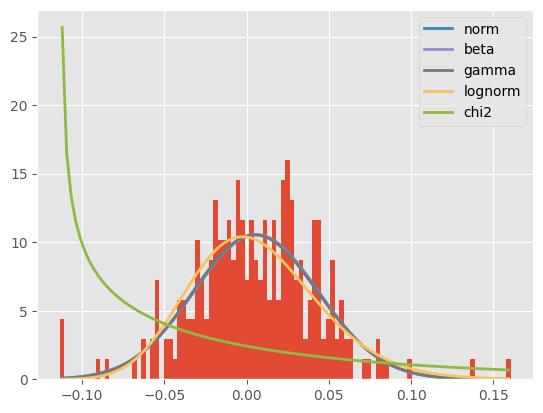

In [267]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(datos['TRMD'],distributions=['gamma','lognorm','beta','norm','chi2'])
f.fit()
f.summary()


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,808.924,69.072,79.648,inf,0.038,0.857
beta,809.246,70.954,85.056,inf,0.038,0.858
gamma,809.284,62.630,73.207,inf,0.037,0.876
norm,812.467,91.417,98.467,inf,0.039,0.821
chi2,5823.632,-166.373,-155.797,inf,0.497,0.000


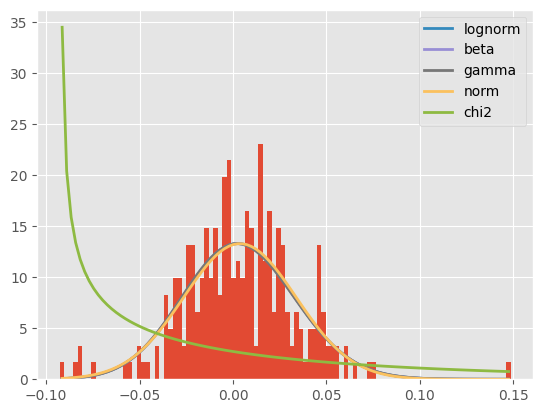

In [268]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(datos['ARLP'],distributions=['gamma','lognorm','beta','norm','chi2'])
f.fit()
f.summary()


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,308.707,-12.177,-1.601,inf,0.052,0.497
lognorm,310.241,-16.362,-5.786,inf,0.055,0.429
norm,311.576,-21.264,-14.213,inf,0.056,0.394
beta,316.610,-26.539,-12.438,inf,0.060,0.307
chi2,1809.265,-119.700,-109.124,inf,0.480,0.000


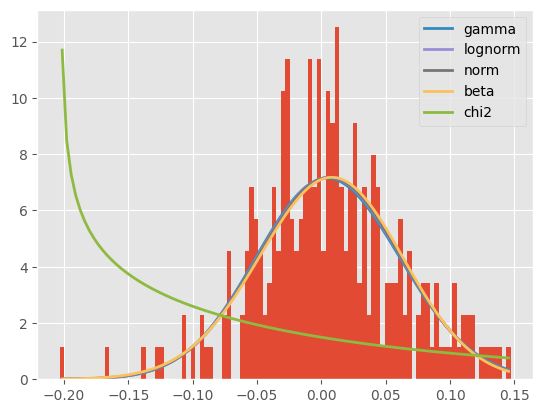

In [269]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(datos['BTU'],distributions=['gamma','lognorm','beta','norm','chi2'])
f.fit()
f.summary()


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1822.841,-307.512,-293.410,inf,0.072,0.136
norm,1876.981,-281.522,-274.471,inf,0.086,0.047
gamma,1878.107,-279.441,-268.865,inf,0.086,0.046
lognorm,1880.152,-279.317,-268.741,inf,0.086,0.048
chi2,1881.611,-277.863,-267.287,inf,0.096,0.019


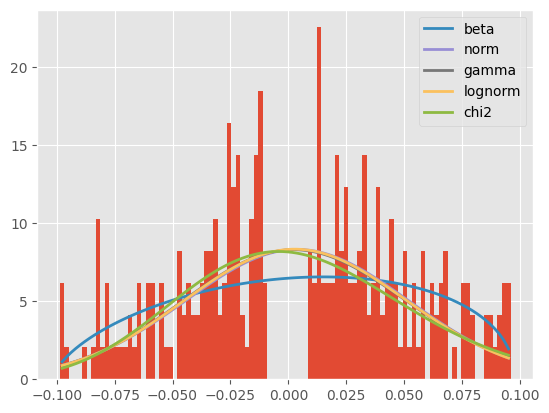

In [270]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(datos['CEIX'],distributions=['gamma','lognorm','beta','norm','chi2'])
f.fit()
f.summary()

Obtener parametros

In [15]:


media1, sd1 = norm.fit(datos['YPF'])
media2, sd2 = norm.fit(datos['TRMD'])
media3, sd3 = norm.fit(datos['ARLP'])
media4, sd4 = norm.fit(datos['BTU'])
media5, sd5 = norm.fit(datos['CEIX'])




print("Resumen de parámetros de las diferentes distribuciones de probabilidad de los activos financieros:")
print(" ")
print(" ")
print("Parámetros de la distribución normal ajustada los retornos del activo 1")
print("Media: {}".format(media1))
print("SD: {}".format(sd1))
print("================================================================================")
print(" ")

print("Parámetros de la distribución normal ajustada los retornos del activo 2")
print("Media: {}".format(media2))
print("SD: {}".format(sd2))
print("================================================================================")
print(" ")

print("Parámetros de la distribución normal ajustada los retornos del activo 3")
print("Media: {}".format(media3))
print("SD: {}".format(sd3))
print("================================================================================")
print(" ")

print("Parámetros de la distribución normal ajustada los retornos del activo 4")
print("Media: {}".format(media4))
print("SD: {}".format(sd4))
print("================================================================================")
print(" ")


print("Parámetros de la distribución normal ajustada los retornos del activo 5")
print("Media: {}".format(media5))
print("SD: {}".format(sd5))


Resumen de parámetros de las diferentes distribuciones de probabilidad de los activos financieros:
 
 
Parámetros de la distribución normal ajustada los retornos del activo 1
Media: 0.02870272642629482
SD: 0.021351160080011616
 
Parámetros de la distribución normal ajustada los retornos del activo 2
Media: 0.005927927430278885
SD: 0.037831236499133
 
Parámetros de la distribución normal ajustada los retornos del activo 3
Media: 0.003714903900398407
SD: 0.02998545893452745
 
Parámetros de la distribución normal ajustada los retornos del activo 4
Media: 0.006201811641434264
SD: 0.05558501599270531
 
Parámetros de la distribución normal ajustada los retornos del activo 5
Media: 0.037342726147410354
SD: 0.480201676057086


In [16]:
#Retorno de las acciones: 


Activo1 = N(media1, sd1)
Activo2 = N(media2, sd2)
Activo3 = N(media3, sd3)
Activo4 = N(media4, sd4)
Activo5 = N(media5, sd5)

In [17]:
#Correlación de los rendimientos de las acciones:

c_target = np.array(corr)


In [18]:
# Correlacionar los números aleatorios
correlate([Activo1, Activo2, Activo3, Activo4, Activo5], c_target)

In [ ]:
pip install --upgrade matplotlib

AttributeError: 'Axes' object has no attribute 'is_first_col'

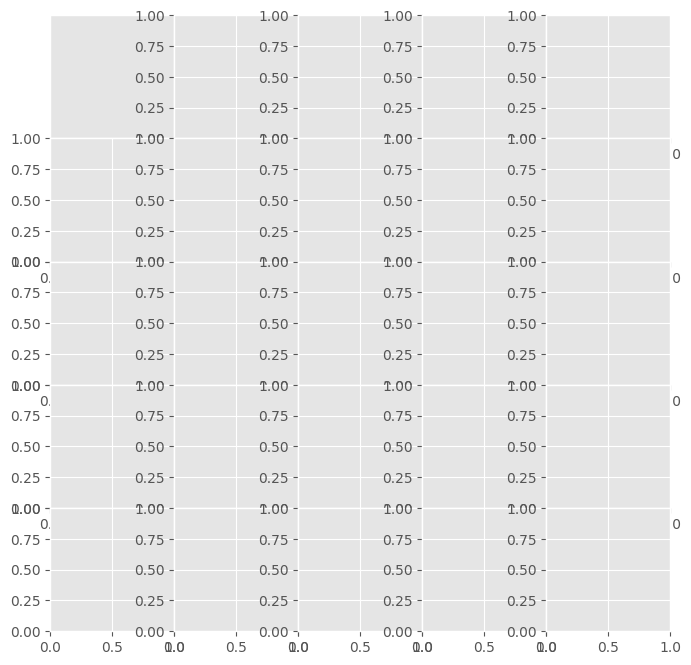

In [19]:
# graficar y etiquetar de la matriz de correlación
corrplot2 = plotcorr([Activo1, Activo2, Activo3, Activo4, Activo5], labels=["YPF", "HP", "PBF", "BTU", "CEIX" ])

In [21]:
#Nueva matriz de correlación:
c2 = correlation_matrix([Activo1, Activo2, Activo3, Activo4, Activo5])
c2

array([[ 1.   , -0.101, -0.112, -0.12 , -0.034],
       [-0.101,  1.   ,  0.436,  0.344,  0.26 ],
       [-0.112,  0.436,  1.   ,  0.637,  0.537],
       [-0.12 ,  0.344,  0.637,  1.   ,  0.568],
       [-0.034,  0.26 ,  0.537,  0.568,  1.   ]])

In [22]:
# Número de iteraciones
# nR = 250
npts = 250

# assign the 6x 10,000 values to 6 variables so we can process their arrays later
Activo1_2 = Activo1._mcpts
Activo2_2 = Activo2._mcpts
Activo3_2 = Activo3._mcpts
Activo4_2 = Activo4._mcpts
Activo5_2 = Activo5._mcpts


# Combinar los 6 arrays en una tabla
rand1 = np.vstack((Activo1_2, Activo2_2, Activo3_2, Activo4_2 ,Activo5_2))

# copy the array to a dataframe for a more transparent layout
df1 = pd.DataFrame(data=rand1).T 
df1.rename(columns={ 
    0:"YPF", 1:"TRMD", 2:"ARLP", 3:"BTU" , 4:"CEIX" }, 
    inplace=True)


In [ ]:
df1.to_excel("Prueba.xlsx")

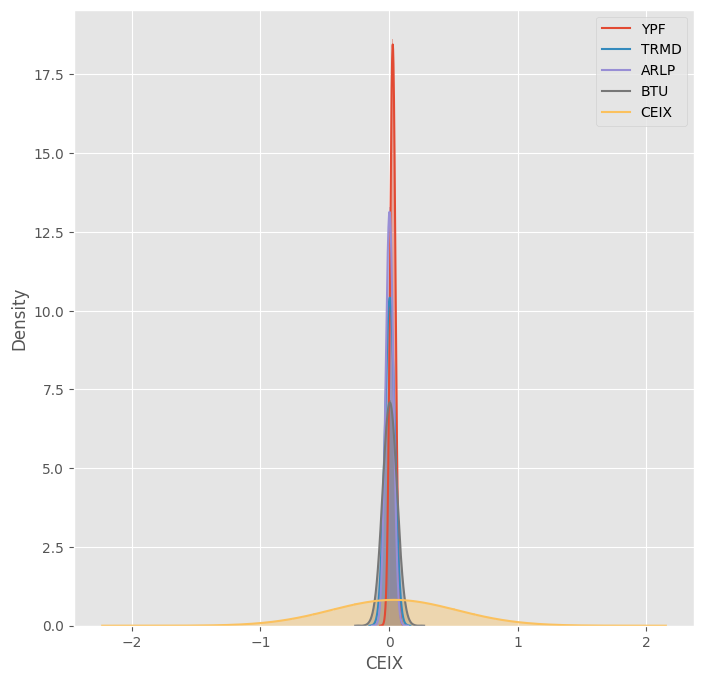

In [23]:
# Graficamos los histogramas:
f, axes = plt.subplots(1,1, figsize = (8,8))
sns.distplot(df1["YPF"])
sns.distplot(df1["TRMD"])
sns.distplot(df1["ARLP"])
sns.distplot(df1["BTU"])
sns.distplot(df1["CEIX"])
plt.legend(labels=["YPF","TRMD", "ARLP","BTU","CEIX"])                                   

In [24]:
#Definimos el promedio del rendimiento de cada acción:
media_Activo1 = np.mean(Activo1_2)
media_Activo2 = np.mean(Activo2_2) 
media_Activo3 = np.mean(Activo3_2)
media_Activo4 = np.mean(Activo4_2)
media_Activo5 = np.mean(Activo5_2)

m_medias = np.array([[media_Activo1],[media_Activo2],[media_Activo3],[media_Activo4],[media_Activo5]])

In [25]:
#Matriz de ponderaciones:
c_pond = np.array([0.2, 0.2, 0.2, 0.2 ,0.2 ])

In [26]:
#Definimos retorno esperado del portafolio 
mean_portafolio = c_pond  @ m_medias
mean_portafolio[0]

0.01637397038389598

In [27]:
#Definimos la varianza del portafolio
var_portafolio = c_pond.T @ np.dot(c2, c_pond)
var_portafolio

0.3931381432127719

In [28]:
#Definimos la desviación estandar del portafolio
sd_portafolio = np.sqrt(var_portafolio)
sd_portafolio

0.6270072911958615

In [29]:
#Definimos el sharpe ratio
Shar_r = mean_portafolio[0]/sd_portafolio
Shar_r

0.026114481623757

In [30]:
print("Información del portafolio de inversión:")
print(" ")
print("Participación activo 1: {}".format(c_pond[0]))
print("Participación activo 2: {}".format(c_pond[1]))
print("Participación activo 3: {}".format(c_pond[2]))
print("Participación activo 4: {}".format(c_pond[3]))
print("Participación activo 5: {}".format(c_pond[4]))

print(" ")

print("Media: {}".format(mean_portafolio[0]))
# print("Varianza: {}".format(var_portafolio))
print("Desviación estandar: {}".format(sd_portafolio))
print("Sharpe ratio: {}".format(Shar_r))

Información del portafolio de inversión:
 
Participación activo 1: 0.2
Participación activo 2: 0.2
Participación activo 3: 0.2
Participación activo 4: 0.2
Participación activo 5: 0.2
 
Media: 0.01637397038389598
Desviación estandar: 0.6270072911958615
Sharpe ratio: 0.026114481623757


In [92]:
#Generación de núemeros aleatorios para las participaciones o pesos:

pesos = np.random.random(5)
pesos =  pesos / np.sum(pesos)
pesos.sum()
pesos

array([0.154, 0.137, 0.285, 0.243, 0.182])

In [32]:
#Definimos retorno esperado del portafolio 
ret_esp = (pesos @ m_medias)
ret_esp[0]

0.01953772537781604

In [33]:
#Covarianza esperada del retorno del portafolio
var_esp = np.dot( pesos.T, np.dot(c2,pesos) )
var_esp

0.38821692491529763

In [34]:
#Desviación estandar esperada del retorno del portafolio
sd_esp= np.sqrt(var_esp)
sd_esp

0.6230705617466593

In [196]:
# Simulación de montecarlo para optimizar el portafolio de inversión:

iteraciones = 1000000

sim_ret = []
sim_sd = []


for p in range(iteraciones):
    pesos = np.random.random(5)
    pesos1 =  pesos / np.sum(pesos)
    
    sim_ret_esp = (pesos1 @ m_medias)
    sim_ret.append(sim_ret_esp[0])
    
    sim_var_esp = np.dot( np.transpose(pesos1), np.dot(c2,pesos1))
    sd_esp= np.sqrt(sim_var_esp)
    sim_sd.append(sd_esp)
    
sim_ret = np.array(sim_ret) 
sim_sd = np.array(sim_sd)  



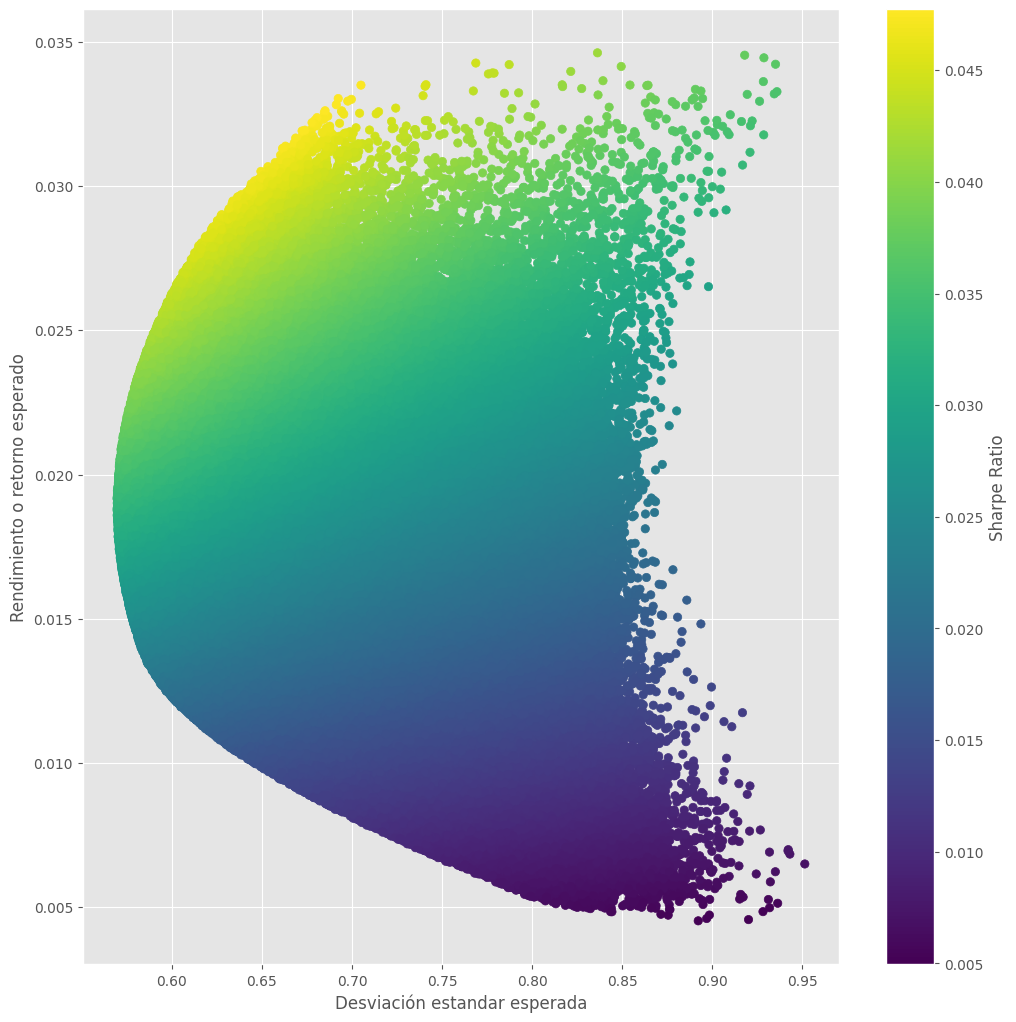

In [197]:
# Definimos el Sharp Ratio
# Retorno esperado menos la tasa libre de riesgo sobre la desviación estandar asociada al retorno

#Graficamos:

plt.figure(figsize=(12.2,12.4))
plt.scatter(sim_sd , sim_ret , c= sim_ret / sim_sd, marker= "o")
plt.grid(True)
plt.xlabel("Desviación estandar esperada")
plt.ylabel("Rendimiento o retorno esperado")
plt.colorbar(cmap="plasma", label = "Sharpe Ratio")
plt.show()

In [217]:
#Optimizar el portafolio de inversión:
import scipy.optimize as sco

def metricas(pesos1):
    pesos = np.array(pesos1)
    sim_ret_esp = (pesos1 @ m_medias)
    sim_sd =np.sqrt(np.dot( np.transpose(pesos1), np.dot(c2,pesos1)))
    return np.array([sim_ret_esp[0], sim_sd, sim_ret_esp[0]/sim_sd ])

metricas(pesos)


array([0.035, 1.773, 0.02 ])

In [218]:
def sharperatio_minimo(pesos1):
    return -metricas(pesos1)[2]

In [227]:
constr = ({"type": "eq", "fun": lambda x: np.sum(x)-1})
bound = tuple((0,1) for x in range(5))
bound

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [230]:
optimizacion = sco.minimize(sharperatio_minimo, 5 * [1./5], method = "SLSQP", bounds=bound, constraints =constr )
print(optimizacion)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.047876684869215
       x: [ 4.390e-01  0.000e+00  0.000e+00  0.000e+00  5.610e-01]
     nit: 9
     jac: [ 4.186e-06  1.424e-03  1.925e-02  1.707e-02 -3.276e-06]
    nfev: 54
    njev: 9


In [237]:

print("Porcentaje a invertir en el activo 1: {}".format(optimizacion["x"][0]))
print("Porcentaje a invertir en el activo 2: {}".format(optimizacion["x"][1]))
print("Porcentaje a invertir en el activo 3: {}".format(optimizacion["x"][2]))
print("Porcentaje a invertir en el activo 4: {}".format(optimizacion["x"][3]))
print("Porcentaje a invertir en el activo 5: {}".format(optimizacion["x"][4]))


Porcentaje a invertir en el activo 1: 0.4390461746591991
Porcentaje a invertir en el activo 2: 0.0
Porcentaje a invertir en el activo 3: 0.0
Porcentaje a invertir en el activo 4: 0.0
Porcentaje a invertir en el activo 5: 0.5609538253408011


In [205]:
Sharpe_optimizado = metricas(optimizacion["x"])
media = Sharpe_optimizado[0]
sd = Sharpe_optimizado[1]
sharpe_ratio = Sharpe_optimizado[2]

print(media)
print(sd)
print(sharpe_ratio)

0.033537602214893825
0.7004996754998529
0.047876684869215


In [206]:

print("Las siguientes estadisticas corresponden a un portafolio de inversión optimizado: ")
print("")
print("Media: {}".format(media))
print("Desviación estándar: {}".format(sd))
print("Sharpe ratio: {}".format(sharpe_ratio))
print("")

print("Porcentaje a invertir en el activo 1: {}".format(optimizacion["x"][0]))
print("Porcentaje a invertir en el activo 2: {}".format(optimizacion["x"][1]))
print("Porcentaje a invertir en el activo 3: {}".format(optimizacion["x"][2]))
print("Porcentaje a invertir en el activo 4: {}".format(optimizacion["x"][3]))
print("Porcentaje a invertir en el activo 5: {}".format(optimizacion["x"][4]))



Las siguientes estadisticas corresponden a un portafolio de inversión optimizado: 

Media: 0.033537602214893825
Desviación estándar: 0.7004996754998529
Sharpe ratio: 0.047876684869215

Porcentaje a invertir en el activo 1: 0.4390461746591991
Porcentaje a invertir en el activo 2: 0.0
Porcentaje a invertir en el activo 3: 0.0
Porcentaje a invertir en el activo 4: 0.0
Porcentaje a invertir en el activo 5: 0.5609538253408011


Verificación y validación


  
Contrastar el rendimiento promedio del portafolio dada la distribución de pesos resultantes del modelo de optimización con los rendimientos reales, se esperaría que los resultados fueran similares. 

In [207]:
media_real_Activo1 = np.mean(datos["YPF"])
media_real_Activo2 = np.mean(datos["TRMD"]) 
media_real_Activo3 = np.mean(datos["ARLP"])
media_real_Activo4 = np.mean(datos["BTU"])
media_real_Activo5 = np.mean(datos["CEIX"])
m_real_medias = np.array([[media_real_Activo1],[media_real_Activo2],[media_real_Activo3],[media_real_Activo4],[media_real_Activo5]])
c_target
c_pond_opti = np.array([optimizacion["x"][0], optimizacion["x"][1], optimizacion["x"][2], optimizacion["x"][3] , optimizacion["x"][4]])
ret_esp_real = (c_pond_opti @ m_real_medias)
diferencia = (ret_esp_real[0] - media) / ret_esp_real[0]

var_real_portafolio = c_pond_opti.T @ np.dot(c2, c_pond_opti)
sd_real_esp= np.sqrt(var_real_portafolio)




print("Verificación y validación: Rendimiento esperado del portafolio según rendimientos reales de los activos vs los simulados:" )
print("" )
print("Rendimiento esperado según información real y pesos de los activos optimizados: {}".format(ret_esp_real[0]))
print("Rendimiento esperado según información simulada y pesos de los activos optimizados: {}".format(media))
print("Diferencia porcentual entre los resultados: {}%".format(diferencia))

# sd_real_esp


Verificación y validación: Rendimiento esperado del portafolio según rendimientos reales de los activos vs los simulados:

Rendimiento esperado según información real y pesos de los activos optimizados: 0.03354936732079804
Rendimiento esperado según información simulada y pesos de los activos optimizados: 0.033537602214893825
Diferencia porcentual entre los resultados: 0.0003506804105041768%


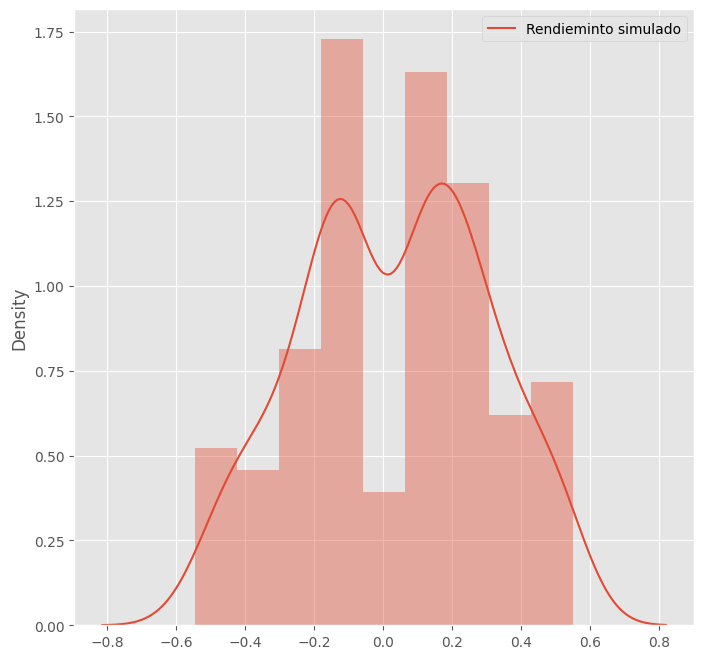

In [208]:
rend_port_diario = (np.array(datos)@c_pond_opti)
rend_port_diario

# Probabilidad de ser menor a 0:

np.quantile(rend_port_diario, 0.43)
# Graficamos los rendimeintos de la simulación:
f, axes = plt.subplots(1,1, figsize = (8,8))
sns.distplot(rend_port_diario)
plt.legend(labels=["Rendieminto simulado"])   

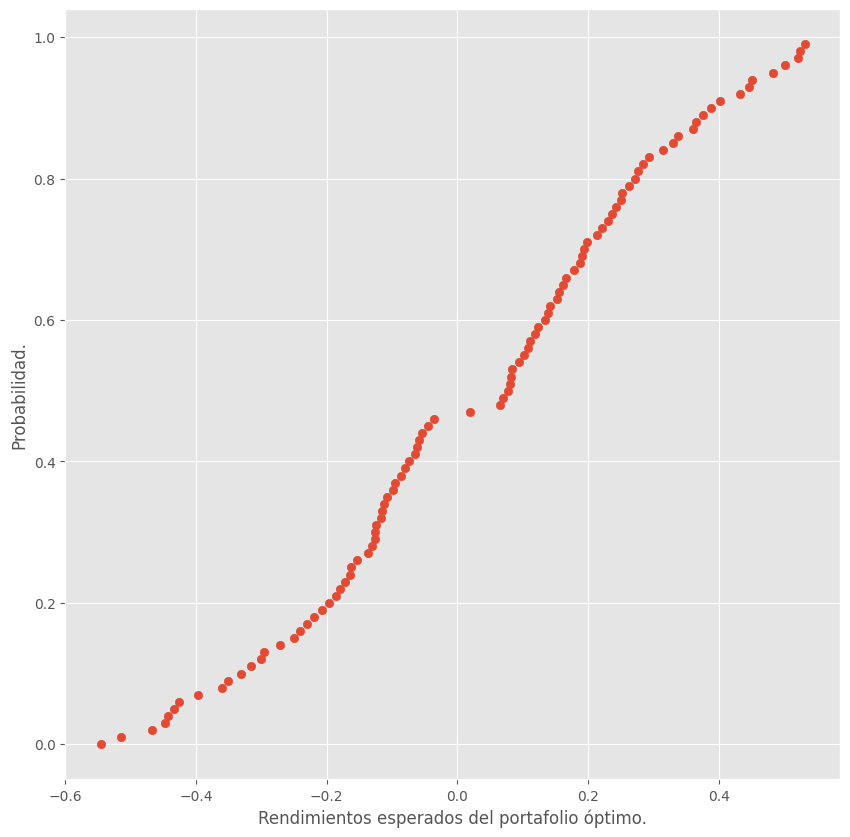

In [209]:
prob = np.array(list(range(len(range(100)))))/100
l1 = list(np.quantile(rend_port_diario, prob))
l2 = list(prob)

fun_prob = np.array([l1, l2 ])

plt.figure(figsize=(10,10))
plt.scatter(l1 , l2)
plt.grid(True)
plt.xlabel("Rendimientos esperados del portafolio óptimo.")
plt.ylabel("Probabilidad.")
plt.show()

In [194]:
print(np.quantile(rend_port_diario, 0.05))
print(np.quantile(rend_port_diario, 0.5))
print(np.quantile(rend_port_diario, 0.75))

-0.4337323273463214
0.07778939369701166
0.23711709446920232


Experimentos:

Primero:  

Generar una nueva simulación de montecarlo para generar nuevos retornos para cada activo del portafolio y probar si bajo dicha configuración de pesos ptimos, el rendimiento esperado del portafolio es similar al optimizado. 

In [195]:
Activo1_3 = Activo1._mcpts
Activo2_3 = Activo2._mcpts
Activo3_3 = Activo3._mcpts
Activo4_3 = Activo4._mcpts
Activo5_3 = Activo5._mcpts


# Combinar los 6 arrays en una tabla
rand3 = np.vstack((Activo1_3, Activo2_3, Activo3_3, Activo4_3 ,Activo5_3))

# copy the array to a dataframe for a more transparent layout
df3 = pd.DataFrame(data=rand1).T 
df3.rename(columns={ 
    0:"YPF", 1:"TRMD", 2:"ARLP", 3:"BTU" , 4:"CEIX" }, 
    inplace=True)


media_sim2_Activo1 = np.mean(df3["YPF"])
media_sim2_Activo2 = np.mean(df3["TRMD"]) 
media_sim2_Activo3 = np.mean(df3["ARLP"])
media_sim2_Activo4 = np.mean(df3["BTU"])
media_sim2_Activo5 = np.mean(df3["CEIX"])
m_sim2_medias = np.array([[media_sim2_Activo1],[media_sim2_Activo2],[media_sim2_Activo3],[media_sim2_Activo4],[media_sim2_Activo5]])
c_target
c_pond_opti = np.array([optimizacion["x"][0], optimizacion["x"][1], optimizacion["x"][2], optimizacion["x"][3] , optimizacion["x"][4]])
ret_esp_sim2 = (c_pond_opti @ m_sim2_medias)
diferencia = (ret_esp_sim2[0] - media) / ret_esp_sim2[0]


print("Experimento 1: Rendimiento esperado del portafolio según nuevos rendimientos simulados vs los simulados inicialmente:" )
print("" )
print("Rendimiento esperado según rendimientos simulados inicialmente y pesos de los activos optimizados: {}".format(ret_esp_sim2[0]))
print("Rendimiento esperado según nuevos rendiemientos simulados y pesos de los activos optimizados: {}".format(media))
print("Diferencia porcentual entre los resultados: {}%".format(diferencia))


Experimento 1: Rendimiento esperado del portafolio según nuevos rendimientos simulados vs los simulados inicialmente:

Rendimiento esperado según rendimientos simulados inicialmente y pesos de los activos optimizados: 0.033537602214893825
Rendimiento esperado según nuevos rendiemientos simulados y pesos de los activos optimizados: 0.033537602214893825
Diferencia porcentual entre los resultados: 0.0%


Tercero:

Realizar una optimización con los rendimientos del año inmediatamente anterior (2020 a 2021) y con la configuración óptima resultante obtener el rendimeinto esperado del año siguiente. Se esperaría que fueran similares.